In [1]:
import tensorflow.keras as keras
%run data_preprocessing.ipynb import generate_training_sequences, SEQUENCE_LENGTH

Loading songs...
Loaded 1700 songs.
Song 0 out of 1700 processed
Song 10 out of 1700 processed


C:\Users\kurle\anaconda3\Lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


Song 20 out of 1700 processed
Song 30 out of 1700 processed
Song 40 out of 1700 processed
Song 50 out of 1700 processed
Song 60 out of 1700 processed
Song 70 out of 1700 processed
Song 80 out of 1700 processed
Song 90 out of 1700 processed
Song 100 out of 1700 processed
Song 110 out of 1700 processed
Song 120 out of 1700 processed
Song 130 out of 1700 processed
Song 140 out of 1700 processed
Song 150 out of 1700 processed
Song 160 out of 1700 processed
Song 170 out of 1700 processed
Song 180 out of 1700 processed
Song 190 out of 1700 processed
Song 200 out of 1700 processed
Song 210 out of 1700 processed
Song 220 out of 1700 processed
Song 230 out of 1700 processed
Song 240 out of 1700 processed
Song 250 out of 1700 processed
Song 260 out of 1700 processed
Song 270 out of 1700 processed
Song 280 out of 1700 processed
Song 290 out of 1700 processed
Song 300 out of 1700 processed
Song 310 out of 1700 processed
Song 320 out of 1700 processed
Song 330 out of 1700 processed
Song 340 out of 

In [2]:
OUTPUT_UNITS = 38
NUM_UNITS = [256]
LOSS = "sparse_categorical_crossentropy"
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 64
SAVE_MODEL_PATH = "model.h5"

In [3]:
def build_model(output_units, num_units, loss, learning_rate):


    input = keras.layers.Input(shape=(None, output_units))
    x = keras.layers.LSTM(num_units[0])(input)
    x = keras.layers.Dropout(0.2)(x)

    output = keras.layers.Dense(output_units, activation="softmax")(x)

    model = keras.Model(input, output)

    model.compile(loss=loss,
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    model.summary()

    return model

In [4]:
def train(output_units=OUTPUT_UNITS, num_units=NUM_UNITS, loss=LOSS, learning_rate=LEARNING_RATE):

    
    inputs, targets = generate_training_sequences(SEQUENCE_LENGTH)

    model = build_model(output_units, num_units, loss, learning_rate)

    model.fit(inputs, targets, epochs=EPOCHS, batch_size=BATCH_SIZE)

    model.save(SAVE_MODEL_PATH)

In [5]:
if __name__ == "__main__":
    train()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 38)]        0         
                                                                 
 lstm (LSTM)                 (None, 256)               302080    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 38)                9766      
                                                                 
Total params: 311846 (1.19 MB)
Trainable params: 311846 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
5663/5663 [==============================] - 1252s 221ms/step - loss: 0.6907 - accuracy: 0.7882
Epoch 2/50
5663/5663 [============================

C:\Users\kurle\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.models import load_model

model = load_model(SAVE_MODEL_PATH)


In [11]:
import os

current_directory = os.getcwd()
files_in_directory = os.listdir(current_directory)
print("Current directory:", current_directory)
print("Files in directory:", files_in_directory)


Current directory: C:\Users\kurle\Desktop\Song-generation-using-RNN
Files in directory: ['.git', '.gitattributes', '.ipynb_checkpoints', 'dataset', 'data_preprocessing.ipynb', 'deutschl', 'file_dataset', 'generator.ipynb', 'mapping.json', 'mel.mid', 'mel.png', 'melscore.mscz', 'model.h5', 'README.md', 'test.ipynb']


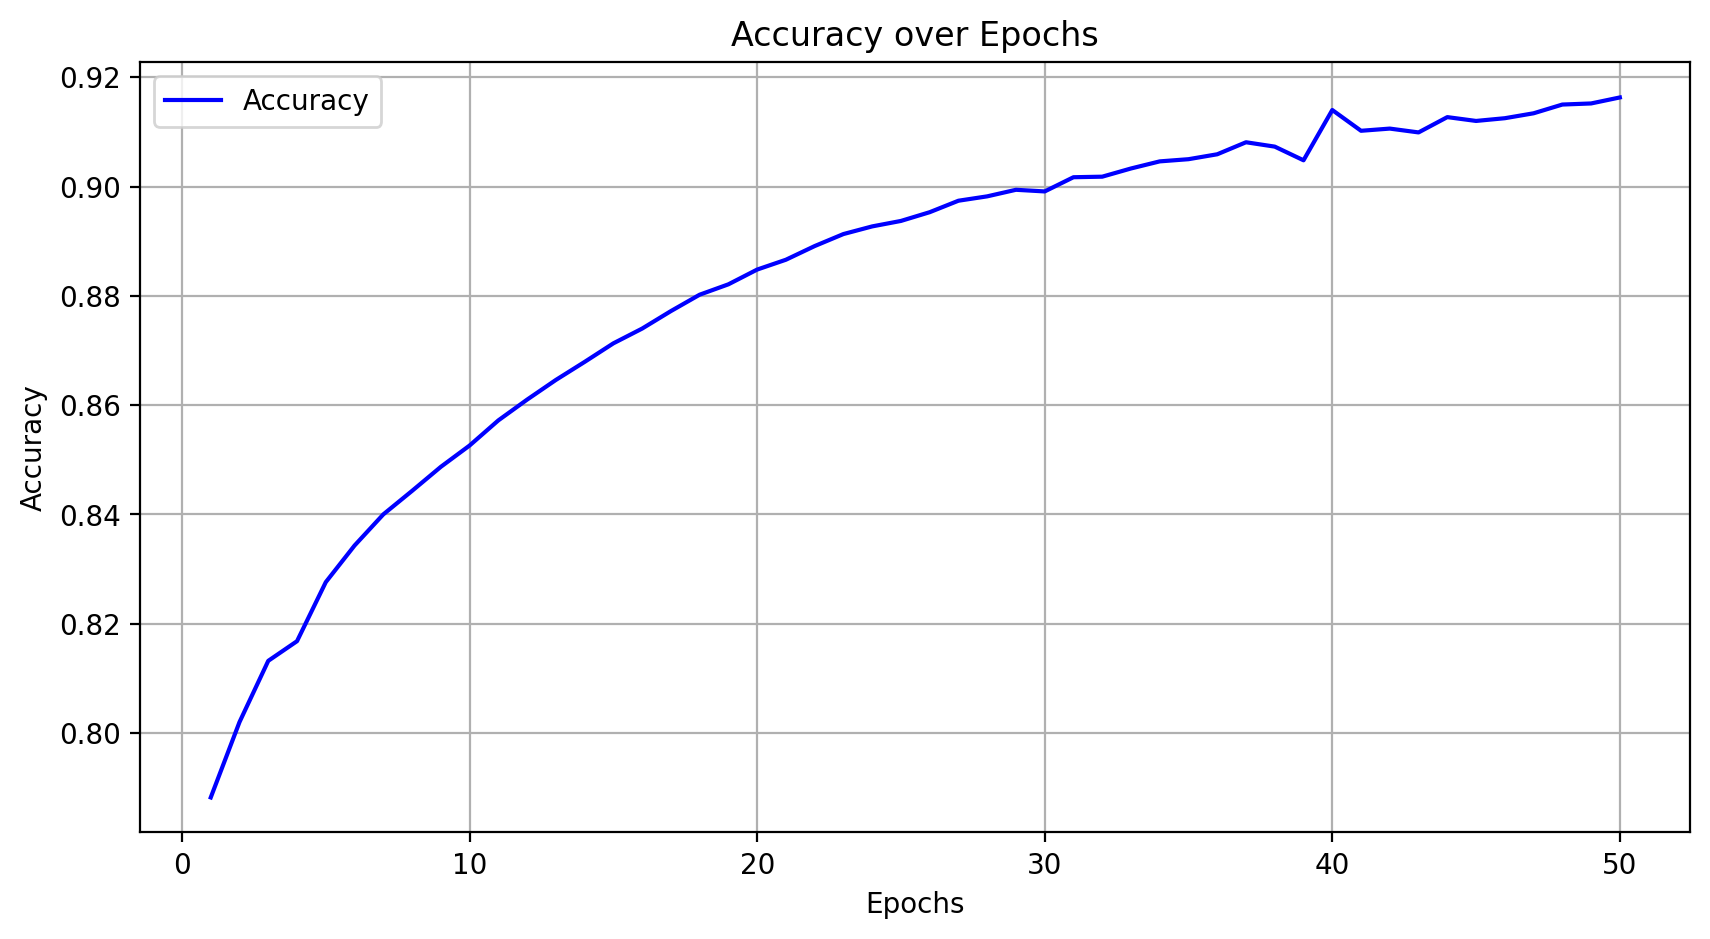

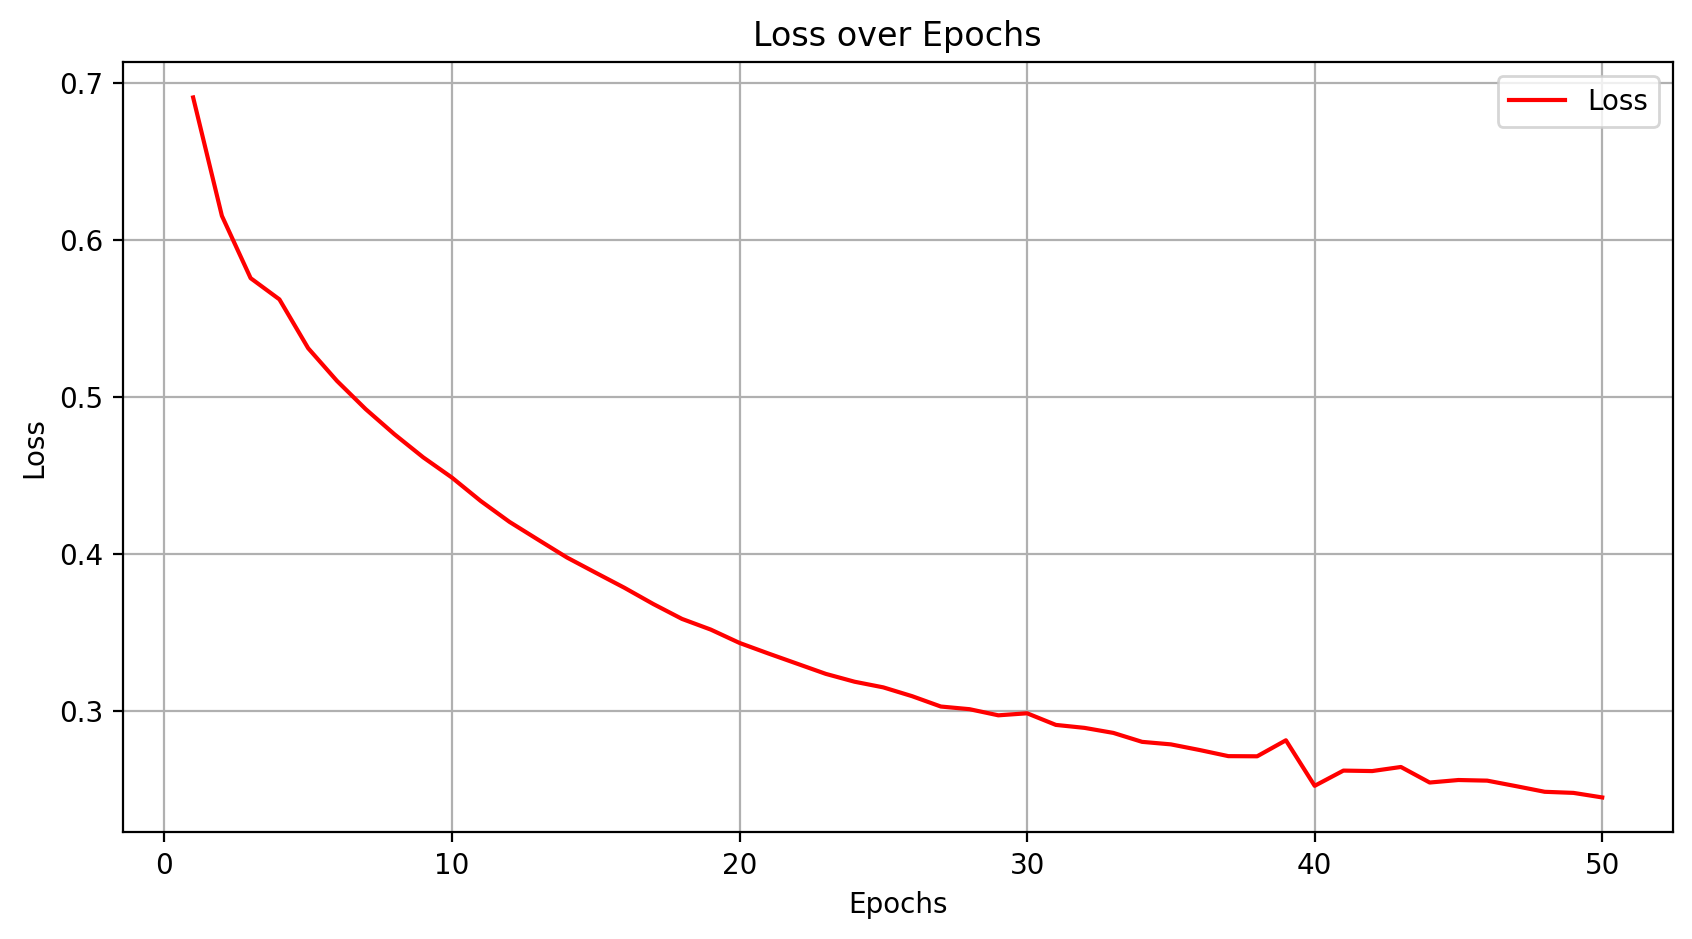

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
accuracy = [0.7882, 0.8020, 0.8132, 0.8168, 0.8276, 0.8343, 0.8400, 0.8443, 0.8487, 0.8526,
            0.8572, 0.8610, 0.8646, 0.8679, 0.8713, 0.8740, 0.8772, 0.8802, 0.8821, 0.8848,
            0.8866, 0.8891, 0.8913, 0.8927, 0.8937, 0.8953, 0.8974, 0.8982, 0.8994, 0.8991,
            0.9017, 0.9018, 0.9033, 0.9046, 0.9050, 0.9059, 0.9081, 0.9073, 0.9048, 0.9140,
            0.9102, 0.9106, 0.9099, 0.9127, 0.9120, 0.9125, 0.9134, 0.9150, 0.9152, 0.9163]

losses = [0.6907, 0.6153, 0.5756, 0.5621, 0.5310, 0.5102, 0.4922, 0.4762, 0.4615, 0.4486,
          0.4337, 0.4204, 0.4090, 0.3977, 0.3880, 0.3784, 0.3681, 0.3586, 0.3518, 0.3433,
          0.3366, 0.3301, 0.3236, 0.3186, 0.3150, 0.3094, 0.3028, 0.3011, 0.2972, 0.2985,
          0.2911, 0.2892, 0.2860, 0.2803, 0.2787, 0.2751, 0.2712, 0.2711, 0.2813, 0.2523,
          0.2620, 0.2617, 0.2643, 0.2544, 0.2560, 0.2556, 0.2521, 0.2485, 0.2478, 0.2449]

# Create an array for the number of epochs
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, losses, 'r', label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
